In [1]:
import os

Data_DIR = os.path.join('Datasets','01')
data = [name for name in sorted(os.listdir(Data_DIR))]

In [2]:
def change_dataset_extension():
    folder = r'Datasets'
    sub_folders = [f.path for f in os.scandir(folder) if f.is_dir()]
    for folder in sub_folders:
        for name in sorted(os.listdir(folder)):
            file_path = os.path.join(folder,name)
            base = os.path.splitext(file_path)[0]
            os.rename(file_path, base + '.csv')

In [3]:
change_dataset_extension()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

DataFrame = pd.read_csv('1_raw_data_13-12_22.03.16.csv', sep='\t')

In [2]:
DataFrame

time  channel1  channel2  channel3  channel4  channel5  channel6  \
0          1   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   
1          5   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   
2          6  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002   
3          7  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002   
4          8  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002   
...      ...       ...       ...       ...       ...       ...       ...   
63191  65657  -0.00001   0.00001  -0.00005  -0.00001  -0.00003  -0.00001   
63192  65658  -0.00001   0.00001  -0.00005  -0.00001  -0.00003  -0.00001   
63193  65659  -0.00001   0.00001  -0.00005  -0.00001  -0.00003  -0.00001   
63194  65660  -0.00001   0.00001  -0.00005  -0.00001  -0.00003  -0.00001   
63195  65661  -0.00001   0.00001  -0.00005  -0.00001  -0.00003  -0.00001   

       channel7  channel8  class  
0       0.00000  -0.00001      0  
1       0.00000  -0.00001      0  
2      -0.00001   0.00001      0  
3      -0.00001   0.00001      0  
4      -0.00001   0.00001      0  
...         ...       ...    ...  
63191  -0.00001  -0.00004      0  
63192  -0.00001  -0.00004      0  
63193  -0.00001  -0.00004      0  
63194  -0.00001  -0.00004      0  
63195  -0.00001  -0.00004      0  

[63196 rows x 10 columns]

In [5]:
DataFrame.plot(x='time', y=['channel1','channel2','channel3','channel4','channel5','channel6','channel7','channel8'], subplots = True, figsize =(16,8))
plt.show()

In [86]:
Df = DataFrame
Df.rename(columns={'class':'group'}, inplace = True)
Df = Df[Df.group == 2].copy()
Df.plot(x='time', y=['channel1','channel2','channel3','channel4','channel5','channel6','channel7','channel8'], subplots = True, figsize =(16,8))
plt.show()

In [8]:
def Full_Rectification(element):
    if element < 0:
        return abs(element)
    return element

In [9]:
Df.plot(x='time', y= 'channel1')

In [10]:
import numpy as np

def RMS(DataFrame,channel):
    shape = DataFrame[channel].shape[0]
    mse = np.sum(DataFrame[channel] ** 2)/shape
    rmse = np.sqrt(mse)
    return rmse
res = RMS(Df,'channel1')

In [11]:
res

0.00022308119566237766

In [12]:
def IAV(signal):
    iav = np.sum(abs(DataFrame[channel]))
    return iav
av = IAV(DataFrame,'channel1')
av

4.69254

In [13]:
def MAV(DataFrame, channel):
    shape = DataFrame[channel].shape[0]
    mav = np.sum(abs(DataFrame[channel]))/shape
    return mav
mav = MAV(DataFrame, 'channel1')
mav

7.42537502373568e-05

In [14]:
def MAV1(DataFrame, channel):
    shape = DataFrame[channel].shape[0]
    array =[]
    for i, value in zip(range(1,shape+1),DataFrame[channel]):
        if 0.25*shape <= i or i <= 0.75 * shape :
            w = 1 
            array.append(w * abs(value))
        else:
            w = 0.5
            array.append(w * abs(value))
    mav1 = np.sum(array)/shape
    return mav1

mav1 = MAV1(DataFrame,'channel1')
mav1

7.42537502373568e-05

In [15]:
def MAV2(DataFrame, channel):
    shape = DataFrame[channel].shape[0]
    array =[]
    for i, value in zip(range(1,shape+1),DataFrame[channel]):
        if 0.25*shape <= i or i <= 0.75 * shape :
            w = 1 
            array.append(w * abs(value))
        elif i < 0.25*shape:
            w = 4 * i / shape
            array.append(w * abs(value))
        else:
            w = 4 * (i - shape) / shape
            array.append(w * abs(value))
    mav2 = np.sum(array)/shape
    return mav2
mav2 = MAV2(Df, 'channel1')
mav2

0.00017150070921985818

In [16]:
def SSI(DataFrame, channel):
    ssi = np.sum(DataFrame[channel] ** 2)
    return ssi
ssi = SSI(Df, 'channel1')
ssi

0.0001754224

In [17]:
def VAR(DataFrame, channel):
    shape = DataFrame[channel].shape[0]
    var = np.sum(DataFrame[channel] ** 2 ) / (shape -1)
    return var
var = VAR(Df, 'channel1')
var

4.977934165720772e-08

In [80]:
Df.reset_index(drop = True, inplace=True)
Df

time  channel1  channel2  channel3  channel4  channel5  channel6  \
0         0.0  -0.00011  -0.00002  -0.00007  -0.00008  -0.00016  -0.00018   
1         1.0   0.00014   0.00001   0.00021   0.00016   0.00012  -0.00025   
2         2.0   0.00014   0.00001   0.00021   0.00016   0.00012  -0.00025   
3         3.0   0.00014   0.00001   0.00021   0.00016   0.00012  -0.00025   
4         4.0   0.00014   0.00001   0.00021   0.00016   0.00012  -0.00025   
...       ...       ...       ...       ...       ...       ...       ...   
3520  33578.0   0.00015  -0.00005   0.00002  -0.00010  -0.00018  -0.00015   
3521  33579.0  -0.00013   0.00001   0.00004  -0.00008   0.00012   0.00014   
3522  33580.0  -0.00003   0.00006   0.00002   0.00002  -0.00001   0.00000   
3523  33581.0  -0.00003   0.00006   0.00002   0.00002  -0.00001   0.00000   
3524  33582.0  -0.00003   0.00006   0.00002   0.00002  -0.00001   0.00000   

      channel7  channel8  group  
0     -0.00036  -0.00001      2  
1     -0.00021   0.00006      2  
2     -0.00021   0.00006      2  
3     -0.00021   0.00006      2  
4     -0.00021   0.00006      2  
...        ...       ...    ...  
3520   0.00013   0.00018      2  
3521  -0.00018  -0.00004      2  
3522  -0.00021  -0.00002      2  
3523  -0.00021  -0.00002      2  
3524  -0.00021  -0.00002      2  

[3525 rows x 10 columns]

In [76]:
Df['time'] = Df['time'].diff().cumsum()


In [81]:
Df['time'] = Df['time'].fillna(0)
Df

time  channel1  channel2  channel3  channel4  channel5  channel6  \
0         0.0  -0.00011  -0.00002  -0.00007  -0.00008  -0.00016  -0.00018   
1         1.0   0.00014   0.00001   0.00021   0.00016   0.00012  -0.00025   
2         2.0   0.00014   0.00001   0.00021   0.00016   0.00012  -0.00025   
3         3.0   0.00014   0.00001   0.00021   0.00016   0.00012  -0.00025   
4         4.0   0.00014   0.00001   0.00021   0.00016   0.00012  -0.00025   
...       ...       ...       ...       ...       ...       ...       ...   
3520  33578.0   0.00015  -0.00005   0.00002  -0.00010  -0.00018  -0.00015   
3521  33579.0  -0.00013   0.00001   0.00004  -0.00008   0.00012   0.00014   
3522  33580.0  -0.00003   0.00006   0.00002   0.00002  -0.00001   0.00000   
3523  33581.0  -0.00003   0.00006   0.00002   0.00002  -0.00001   0.00000   
3524  33582.0  -0.00003   0.00006   0.00002   0.00002  -0.00001   0.00000   

      channel7  channel8  group  
0     -0.00036  -0.00001      2  
1     -0.00021   0.00006      2  
2     -0.00021   0.00006      2  
3     -0.00021   0.00006      2  
4     -0.00021   0.00006      2  
...        ...       ...    ...  
3520   0.00013   0.00018      2  
3521  -0.00018  -0.00004      2  
3522  -0.00021  -0.00002      2  
3523  -0.00021  -0.00002      2  
3524  -0.00021  -0.00002      2  

[3525 rows x 10 columns]

In [87]:
Df.set_index('time')

channel1  channel2  channel3  channel4  channel5  channel6  channel7  \
time                                                                          
6662   -0.00011  -0.00002  -0.00007  -0.00008  -0.00016  -0.00018  -0.00036   
6663    0.00014   0.00001   0.00021   0.00016   0.00012  -0.00025  -0.00021   
6664    0.00014   0.00001   0.00021   0.00016   0.00012  -0.00025  -0.00021   
6665    0.00014   0.00001   0.00021   0.00016   0.00012  -0.00025  -0.00021   
6666    0.00014   0.00001   0.00021   0.00016   0.00012  -0.00025  -0.00021   
...         ...       ...       ...       ...       ...       ...       ...   
40240   0.00015  -0.00005   0.00002  -0.00010  -0.00018  -0.00015   0.00013   
40241  -0.00013   0.00001   0.00004  -0.00008   0.00012   0.00014  -0.00018   
40242  -0.00003   0.00006   0.00002   0.00002  -0.00001   0.00000  -0.00021   
40243  -0.00003   0.00006   0.00002   0.00002  -0.00001   0.00000  -0.00021   
40244  -0.00003   0.00006   0.00002   0.00002  -0.00001   0.00000  -0.00021   

       channel8  group  
time                    
6662   -0.00001      2  
6663    0.00006      2  
6664    0.00006      2  
6665    0.00006      2  
6666    0.00006      2  
...         ...    ...  
40240   0.00018      2  
40241  -0.00004      2  
40242  -0.00002      2  
40243  -0.00002      2  
40244  -0.00002      2  

[3525 rows x 9 columns]

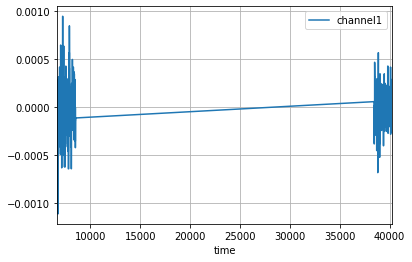

In [94]:
Df.plot(x='time',y='channel1', grid=True)